In [1]:
!pip install -U asteroid

     |████████████████████████████████| 241 kB 5.3 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
     |████████████████████████████████| 596 kB 37.5 MB/s 
     |████████████████████████████████| 523 kB 51.4 MB/s 
     |████████████████████████████████| 61 kB 560 kB/s 
     |████████████████████████████████| 59 kB 8.0 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 329 kB 64.0 MB/s 
     |████████████████████████████████| 829 kB 39.6 MB/s 
     |████████████████████████████████| 132 kB 64.3 MB/s 
     |████████████████████████████████| 1.1 MB 38.6 MB/s 
     |████████████████████████████████| 192 kB 72.2 MB/s 
     |████████████████████████████████| 160 kB 68.0 MB/s 
     |████████████████████████████████| 271 kB 50.1 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=24924ea5e1de76b24c8e1cf66be92346fc0428db43bba6ad521c511e842f8aea
  Stored in directory: /root/.cache/pip/wheel

In [2]:
!wget https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav

--2021-11-26 00:52:04--  https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav
Resolving www.merl.com (www.merl.com)... 137.203.190.5
Connecting to www.merl.com (www.merl.com)|137.203.190.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168680 (165K) [audio/x-wav]
Saving to: ‘female-female-mixture.wav’

female-female-mixtu 100%[===================>] 164.73K  --.-KB/s    in 0.07s   

2021-11-26 00:52:04 (2.26 MB/s) - ‘female-female-mixture.wav’ saved [168680/168680]



In [3]:
from IPython.display import display, Audio

display(Audio("female-female-mixture.wav"))

In [4]:
!asteroid-infer "mpariente/DPRNNTasNet-ks2_WHAM_sepclean" --files female-female-mixture.wav
!echo "-----"
!ls

Downloading: 100% 14.7M/14.7M [00:00<00:00, 36.8MB/s]
-----
female-female-mixture_est1.wav	female-female-mixture.wav
female-female-mixture_est2.wav	sample_data


In [5]:
display(Audio("female-female-mixture_est1.wav"))
display(Audio("female-female-mixture_est2.wav"))

In [6]:
from asteroid.models import BaseModel
import soundfile as sf

# 'from_pretrained' automatically uses the right model class (asteroid.models.DPRNNTasNet).
model = BaseModel.from_pretrained("mpariente/DPRNNTasNet-ks2_WHAM_sepclean")

In [7]:
mixture, _ = sf.read("female-female-mixture.wav", dtype="float32", always_2d=True)
mixture = mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])
out_wavs = model.separate(mixture)

# Or simply a file name:
model.separate("female-female-mixture.wav")

/usr/local/lib/python3.7/dist-packages/asteroid/separate.py:150: UserWarning: File female-female-mixture_est1.wav already exists, pass `force_overwrite=True` to overwrite it
  UserWarning,


In [8]:
!pip install librosa

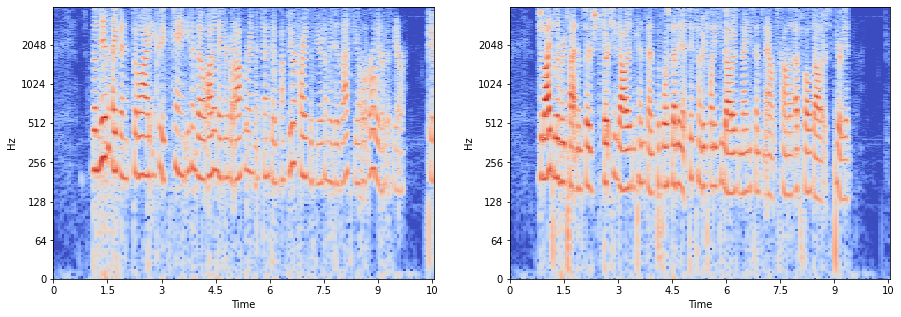

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


def show_magspec(waveform, **kw):
    return librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(librosa.stft(waveform))),
        y_axis="log", x_axis="time",
        **kw
    )


est1 = sf.read("female-female-mixture_est1.wav")[0]
est2 = sf.read("female-female-mixture_est2.wav")[0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
show_magspec(est1, sr=8000, ax=ax[0])
show_magspec(est2, sr=8000, ax=ax[1])